In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from knn import *


## Get data for face, pose and illumination training and testing

In [4]:
from get_train_test_data_2 import *

In [74]:
#exec(open("get_train_test_data1.py").read(), globals())

In [5]:
train_test_all = get_train_test_data()
print(train_test_all.keys())

---------- Data
(24, 21, 600)
(600, 24, 21)
(200, 3, 504)
---------- Data
---------- Pose
(48, 40, 13, 68)
(68, 13, 48, 40)
---------- Pose
---------- Illum
(1920, 21, 68)
(68, 21, 1920)
---------- Illum
dict_keys(['data', 'pose', 'illum'])


In [6]:
#exec(open("knn.py").read(), globals())

In [7]:
k_choices = [1, 3, 5, 13, 15]

>> Classify for data.mat

In [8]:
train_x_face = train_test_all['data'][0]
train_y_face = train_test_all['data'][1]
test_x_face = train_test_all['data'][2]

acc_data_orig = []
for k in k_choices:
    knn = KNN(k,train_x_face,train_y_face,test_x_face)
    predicted_data = knn.classify()
    acc = accuracy_score(train_test_all['data'][3], predicted_data)
    acc_data_orig.append(acc)
    print('For K= ',k,' accuraccy is ',acc)
    


For K=  1  accuraccy is  0.56
For K=  3  accuraccy is  0.225
For K=  5  accuraccy is  0.17
For K=  13  accuraccy is  0.095
For K=  15  accuraccy is  0.075


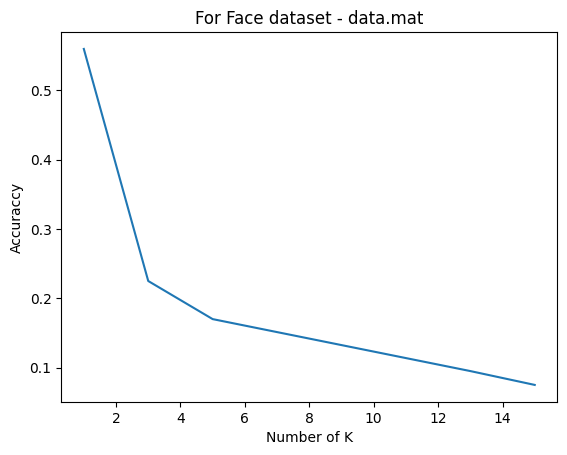

In [31]:
plt.figure()
plt.title('For Face dataset - data.mat')
plt.xlabel('Number of K')
plt.ylabel('Accuraccy')
plt.plot(k_choices,acc_data_orig)
plt.savefig("acc_data_orig.png")

>> Pose

In [10]:
train_x_face = train_test_all['pose'][0]
train_y_face = train_test_all['pose'][1]
test_x_face = train_test_all['pose'][2]

acc_pose_orig = []
for k in k_choices:
    knn = KNN(k,train_x_face,train_y_face,test_x_face)
    predicted_data = knn.classify()
    acc = accuracy_score(train_test_all['pose'][3], predicted_data)
    acc_pose_orig.append(acc)
    print('For K= ',k,' accuraccy is ',acc)

For K=  1  accuraccy is  0.39705882352941174
For K=  3  accuraccy is  0.27941176470588236
For K=  5  accuraccy is  0.20588235294117646
For K=  13  accuraccy is  0.10294117647058823
For K=  15  accuraccy is  0.07352941176470588


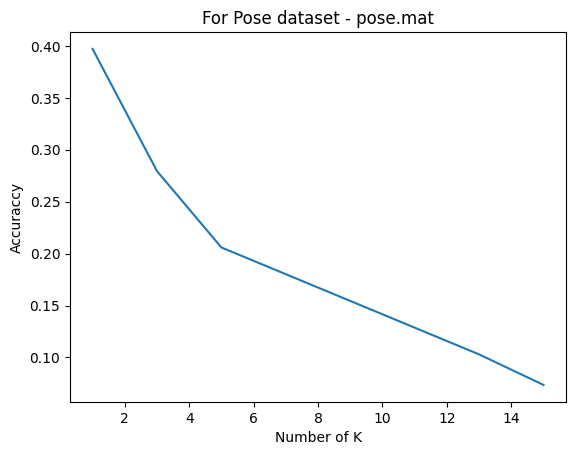

In [30]:
plt.figure()
plt.title('For Pose dataset - pose.mat')
plt.xlabel('Number of K')
plt.ylabel('Accuraccy')
plt.plot(k_choices,acc_pose_orig)
plt.savefig("acc_pose_orig.png")

>> Illumination

In [13]:
train_x_face = train_test_all['illum'][0]
train_y_face = train_test_all['illum'][1]
test_x_face = train_test_all['illum'][2]

acc_illum_orig = []
for k in k_choices:
    knn = KNN(k,train_x_face,train_y_face,test_x_face)
    predicted_data = knn.classify()
    acc = accuracy_score(train_test_all['illum'][3], predicted_data)
    acc_illum_orig.append(acc)
    print('For K= ',k,' accuraccy is ',acc)
    


For K=  1  accuraccy is  0.014705882352941176
For K=  3  accuraccy is  0.029411764705882353
For K=  5  accuraccy is  0.014705882352941176
For K=  13  accuraccy is  0.029411764705882353
For K=  15  accuraccy is  0.029411764705882353


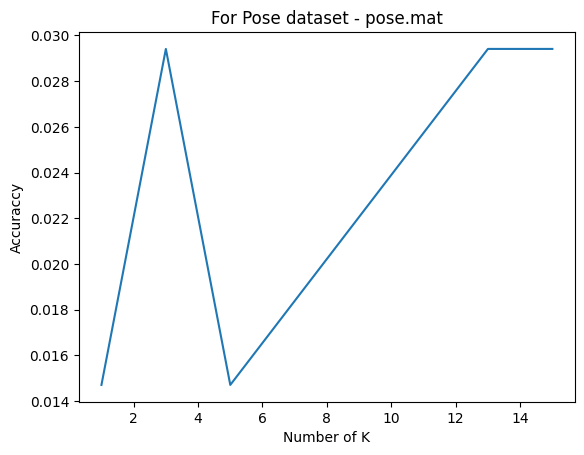

In [29]:
plt.figure()
plt.title('For Pose dataset - pose.mat')
plt.xlabel('Number of K')
plt.ylabel('Accuraccy')
plt.plot(k_choices,acc_illum_orig)
plt.savefig("acc_illum_orig.png")

## Principle Component Analysis

In [15]:
from pca import *

>> Data.mat

In [16]:
# Try with different number of components
num_comp = [10,50,100,150,170,200]
train_x = train_test_all['data'][0]
test_x = train_test_all['data'][2]
# Resize to 2D:
train_x = train_x.reshape(train_x.shape[0]*train_x.shape[1],train_x.shape[2])
acc_data_pca = []
for num in num_comp:
    pca = PCA(num)
    pca.fit(train_x)
    train_x_dash = pca.transform(train_x)
    # pca = PCA(num)
    # pca.fit(test_x)
    test_x_dash = pca.transform(test_x)
    # print(train_x_dash.shape)
    # print(test_x_dash.shape)
    train_x_dash = train_x_dash.reshape(200,2,num)
    for k in k_choices:
        knn = KNN(k,train_x_dash,train_test_all['data'][1],test_x_dash)
        predicted_data = knn.classify()
        acc = accuracy_score(train_test_all['data'][3], predicted_data)
        acc_data_pca.append(acc)
        print('For num_comp = ',num,' & K= ',k,' accuraccy is ',acc)
    pass


For num_comp =  10  & K=  1  accuraccy is  0.25
For num_comp =  10  & K=  3  accuraccy is  0.15
For num_comp =  10  & K=  5  accuraccy is  0.105
For num_comp =  10  & K=  13  accuraccy is  0.06
For num_comp =  10  & K=  15  accuraccy is  0.06
For num_comp =  50  & K=  1  accuraccy is  0.44
For num_comp =  50  & K=  3  accuraccy is  0.205
For num_comp =  50  & K=  5  accuraccy is  0.155
For num_comp =  50  & K=  13  accuraccy is  0.08
For num_comp =  50  & K=  15  accuraccy is  0.06
For num_comp =  100  & K=  1  accuraccy is  0.52
For num_comp =  100  & K=  3  accuraccy is  0.22
For num_comp =  100  & K=  5  accuraccy is  0.16
For num_comp =  100  & K=  13  accuraccy is  0.08
For num_comp =  100  & K=  15  accuraccy is  0.08
For num_comp =  150  & K=  1  accuraccy is  0.545
For num_comp =  150  & K=  3  accuraccy is  0.23
For num_comp =  150  & K=  5  accuraccy is  0.17
For num_comp =  150  & K=  13  accuraccy is  0.095
For num_comp =  150  & K=  15  accuraccy is  0.075
For num_comp =  

In [17]:
np.max(acc_data_pca)

0.56

>> Pose

In [18]:
# Try with different number of components
num_comp = [10,30,50,70,85]
train_x = train_test_all['pose'][0]
test_x = train_test_all['pose'][2]
# Resize to 2D:
train_x = train_x.reshape(train_x.shape[0]*train_x.shape[1],train_x.shape[2]*train_x.shape[3])
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])
acc_pose_pca = []
for num in num_comp:
    pca = PCA(num)
    pca.fit(train_x)
    train_x_dash = pca.transform(train_x)
    test_x_dash = pca.transform(test_x)
   #  print(train_x_dash.shape)
   #  print(test_x_dash.shape)
    train_x_dash = train_x_dash.reshape(68,7,num)

    for k in k_choices:
       knn = KNN(k,train_x_dash,train_test_all['pose'][1],test_x_dash)
       predicted_data = knn.classify()
       acc = accuracy_score(train_test_all['pose'][3], predicted_data)
       acc_pose_pca.append(acc)
       print('For num_comp = ',num,' & K= ',k,' accuraccy is ',acc)
    pass

For num_comp =  10  & K=  1  accuraccy is  0.5147058823529411
For num_comp =  10  & K=  3  accuraccy is  0.22058823529411764
For num_comp =  10  & K=  5  accuraccy is  0.23529411764705882
For num_comp =  10  & K=  13  accuraccy is  0.07352941176470588
For num_comp =  10  & K=  15  accuraccy is  0.07352941176470588
For num_comp =  30  & K=  1  accuraccy is  0.6029411764705882
For num_comp =  30  & K=  3  accuraccy is  0.3235294117647059
For num_comp =  30  & K=  5  accuraccy is  0.2647058823529412
For num_comp =  30  & K=  13  accuraccy is  0.058823529411764705
For num_comp =  30  & K=  15  accuraccy is  0.058823529411764705
For num_comp =  50  & K=  1  accuraccy is  0.5882352941176471
For num_comp =  50  & K=  3  accuraccy is  0.3382352941176471
For num_comp =  50  & K=  5  accuraccy is  0.2647058823529412
For num_comp =  50  & K=  13  accuraccy is  0.058823529411764705
For num_comp =  50  & K=  15  accuraccy is  0.058823529411764705
For num_comp =  70  & K=  1  accuraccy is  0.5735294

In [19]:
np.max(acc_pose_pca)

0.6029411764705882

>> Illum

In [20]:
# Try with different number of components
num_comp = [10,30,170,200,250,300]
train_x = train_test_all['illum'][0]
test_x = train_test_all['illum'][2]
# Resize to 2D:
train_x = train_x.reshape(train_x.shape[0]*train_x.shape[1],train_x.shape[2])
acc_illum_pca = []
for num in num_comp:
    pca = PCA(num)
    pca.fit(train_x)
    train_x_dash = pca.transform(train_x)
    test_x_dash = pca.transform(test_x)
    # print(train_x_dash.shape)
    # print(test_x_dash.shape)
    train_x_dash = train_x_dash.reshape(68,16,num)

    for k in k_choices:
       knn = KNN(k,train_x_dash,train_test_all['illum'][1],test_x_dash)
       predicted_data = knn.classify()
       acc = accuracy_score(train_test_all['illum'][3], predicted_data)
       acc_illum_pca.append(acc)
       print('For num_comp = ',num,' & K= ',k,' accuraccy is ',acc)
    pass

For num_comp =  10  & K=  1  accuraccy is  0.10294117647058823
For num_comp =  10  & K=  3  accuraccy is  0.10294117647058823
For num_comp =  10  & K=  5  accuraccy is  0.04411764705882353
For num_comp =  10  & K=  13  accuraccy is  0.029411764705882353
For num_comp =  10  & K=  15  accuraccy is  0.029411764705882353
For num_comp =  30  & K=  1  accuraccy is  0.1323529411764706
For num_comp =  30  & K=  3  accuraccy is  0.08823529411764706
For num_comp =  30  & K=  5  accuraccy is  0.029411764705882353
For num_comp =  30  & K=  13  accuraccy is  0.029411764705882353
For num_comp =  30  & K=  15  accuraccy is  0.029411764705882353
For num_comp =  170  & K=  1  accuraccy is  0.14705882352941177
For num_comp =  170  & K=  3  accuraccy is  0.08823529411764706
For num_comp =  170  & K=  5  accuraccy is  0.029411764705882353
For num_comp =  170  & K=  13  accuraccy is  0.029411764705882353
For num_comp =  170  & K=  15  accuraccy is  0.029411764705882353
For num_comp =  200  & K=  1  accurac

In [21]:
np.max(acc_illum_pca)

0.16176470588235295

## Multiple Discriminant Analysis (MDA)

In [22]:
from mda import *

>> Data.mat

In [23]:
train_x = train_test_all['data'][0]
test_x = train_test_all['data'][2]
num_newdim = [10,85,120,200,250]
acc_data_mda = []
for n_dim in num_newdim:
    mda_data = MDA(0.5,train_x,test_x,n_dim)
    mda_data.get_matA()
    train_x_dash = mda_data.transform(train_x)
    test_x_dash = mda_data.transform(test_x)

    for k in k_choices:
        knn = KNN(k,train_x_dash,train_test_all['data'][1],test_x_dash)
        predicted_data = knn.classify()
        acc = accuracy_score(train_test_all['data'][3], predicted_data)
        acc_data_mda.append(acc)
        print('For num_comp = ',n_dim,' & K= ',k,' accuraccy is ',acc)
    pass


For num_comp =  10  & K=  1  accuraccy is  0.245
For num_comp =  10  & K=  3  accuraccy is  0.175
For num_comp =  10  & K=  5  accuraccy is  0.115
For num_comp =  10  & K=  13  accuraccy is  0.05
For num_comp =  10  & K=  15  accuraccy is  0.055
For num_comp =  85  & K=  1  accuraccy is  0.535
For num_comp =  85  & K=  3  accuraccy is  0.235
For num_comp =  85  & K=  5  accuraccy is  0.165
For num_comp =  85  & K=  13  accuraccy is  0.095
For num_comp =  85  & K=  15  accuraccy is  0.075
For num_comp =  120  & K=  1  accuraccy is  0.58
For num_comp =  120  & K=  3  accuraccy is  0.235
For num_comp =  120  & K=  5  accuraccy is  0.17
For num_comp =  120  & K=  13  accuraccy is  0.085
For num_comp =  120  & K=  15  accuraccy is  0.07
For num_comp =  200  & K=  1  accuraccy is  0.59
For num_comp =  200  & K=  3  accuraccy is  0.24
For num_comp =  200  & K=  5  accuraccy is  0.175
For num_comp =  200  & K=  13  accuraccy is  0.09
For num_comp =  200  & K=  15  accuraccy is  0.075
For num_c

In [24]:
np.max(acc_data_mda)

0.59

>> Pose

In [25]:
train_x = train_test_all['pose'][0]
test_x = train_test_all['pose'][2]
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2]*train_x.shape[3])
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])
num_newdim = [10,85,120,200,250]
acc_pose_mda = []
for n_dim in num_newdim:
    mda_pose = MDA(0.5,train_x,test_x,n_dim)
    mda_pose.get_matA()
    train_x_dash = mda_pose.transform(train_x)
    test_x_dash = mda_pose.transform(test_x)
    
    for k in k_choices:
        knn = KNN(k,train_x_dash,train_test_all['pose'][1],test_x_dash)
        predicted_data = knn.classify()
        acc = accuracy_score(train_test_all['pose'][3], predicted_data)
        acc_pose_mda.append(acc)
        print('For num_comp = ',n_dim,' & K= ',k,' accuraccy is ',acc)
        pass

For num_comp =  10  & K=  1  accuraccy is  0.7352941176470589
For num_comp =  10  & K=  3  accuraccy is  0.35294117647058826
For num_comp =  10  & K=  5  accuraccy is  0.16176470588235295
For num_comp =  10  & K=  13  accuraccy is  0.07352941176470588
For num_comp =  10  & K=  15  accuraccy is  0.07352941176470588
For num_comp =  85  & K=  1  accuraccy is  0.8676470588235294
For num_comp =  85  & K=  3  accuraccy is  0.4117647058823529
For num_comp =  85  & K=  5  accuraccy is  0.17647058823529413
For num_comp =  85  & K=  13  accuraccy is  0.08823529411764706
For num_comp =  85  & K=  15  accuraccy is  0.08823529411764706
For num_comp =  120  & K=  1  accuraccy is  0.8676470588235294
For num_comp =  120  & K=  3  accuraccy is  0.4411764705882353
For num_comp =  120  & K=  5  accuraccy is  0.17647058823529413
For num_comp =  120  & K=  13  accuraccy is  0.08823529411764706
For num_comp =  120  & K=  15  accuraccy is  0.08823529411764706
For num_comp =  200  & K=  1  accuraccy is  0.705

In [26]:
np.max(acc_pose_mda)

0.8676470588235294

>> Illumination

In [27]:
train_x = train_test_all['illum'][0]
test_x = train_test_all['illum'][2]
acc_illum_mda = []
num_newdim = [10,70,150,200,250]
for n_dim in num_newdim:
    mda_illum = MDA(0.1,train_x,test_x,n_dim)
    mda_illum.get_matA()
    train_x_dash = mda_illum.transform(train_x)
    test_x_dash = mda_illum.transform(test_x)

    for k in k_choices:
       knn = KNN(k,train_x_dash,train_test_all['illum'][1],test_x_dash)
       predicted_data = knn.classify()
       acc = accuracy_score(train_test_all['illum'][3], predicted_data)
       acc_illum_mda.append(acc)
       print('For num_comp = ',n_dim,' & K= ',k,' accuraccy is ',acc)
    pass

For num_comp =  10  & K=  1  accuraccy is  0.8382352941176471
For num_comp =  10  & K=  3  accuraccy is  0.16176470588235295
For num_comp =  10  & K=  5  accuraccy is  0.07352941176470588
For num_comp =  10  & K=  13  accuraccy is  0.04411764705882353
For num_comp =  10  & K=  15  accuraccy is  0.04411764705882353
For num_comp =  70  & K=  1  accuraccy is  0.9852941176470589
For num_comp =  70  & K=  3  accuraccy is  0.16176470588235295
For num_comp =  70  & K=  5  accuraccy is  0.058823529411764705
For num_comp =  70  & K=  13  accuraccy is  0.029411764705882353
For num_comp =  70  & K=  15  accuraccy is  0.029411764705882353
For num_comp =  150  & K=  1  accuraccy is  0.014705882352941176
For num_comp =  150  & K=  3  accuraccy is  0.058823529411764705
For num_comp =  150  & K=  5  accuraccy is  0.04411764705882353
For num_comp =  150  & K=  13  accuraccy is  0.029411764705882353
For num_comp =  150  & K=  15  accuraccy is  0.029411764705882353
For num_comp =  200  & K=  1  accuraccy

In [28]:
np.max(acc_illum_mda)

0.9852941176470589